<a href="https://colab.research.google.com/github/otienotilen/searchview/blob/master/Image_classification_using_Keras2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by - **TILEN OTIENO OUMA**
RegNo - **J17/MNU/042/2017**

In [ ]:
#importing important libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

we will be using the CIFAR-10 dataset. CIFAR-10 is a large image dataset containing over 60,000 images representing 10 different classes of objects like cats, planes, and cars.

The images are full-color RGB, but they are fairly small, only 32 x 32. One great thing about the CIFAR-10 dataset is that it comes prepackaged with Keras, so it is very easy to load up the dataset and the images need very little preprocessing.

In [ ]:

# loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print('Size of train data {}'.format(X_train.shape))
print('Size of test data {}'.format(X_test.shape))

Size of train data (50000, 32, 32, 3)
Size of test data (10000, 32, 32, 3)



We have 50K train images and 10K test images. Each image is fairly small of size 32 X 32. Being RGB, image has 3 dimenstions.

In [ ]:
print('Size of train class {}'.format(y_train.shape))
print('Size of test class {}'.format(y_test.shape))

Size of train class (50000, 1)
Size of test class (10000, 1)



We defined class name here for all 10 classes. We also need to specify the number of classes that are in the dataset, so we know how many neurons to compress the final layer down to.

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(np.unique(y_train))

In [ ]:

print('Total class {}'.format(num_classes))

Total class 10


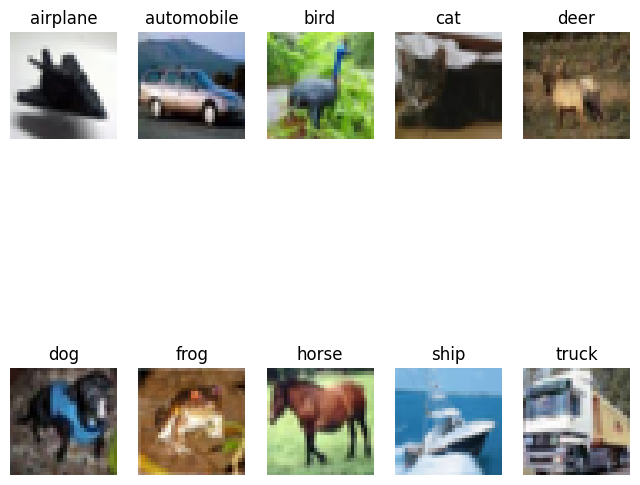

In [ ]:
#plotting first image of all 10 classes from train data
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    ax = plt.subplot(2, 5, i + 1)
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    plt.imshow(features_idx[0])
    ax.set_title(class_names[i])
    plt.axis("off")

Images are too small so they are displayed in distorted way.

In most cases you will need to do some preprocessing of your data to get it ready for use, but since we are using a prepackaged dataset, very little preprocessing needs to be done. One thing we want to do is normalize the input data.

If the values of the input data are in too wide a range it can negatively impact how the network performs. In this case, the input values are the pixels in the image, which have a value between 0 to 255.

So in order to normalize the data we can simply divide the image values by 255. To do this we first need to make the data a float type, since they are currently integers. We can do this by using the astype() Numpy command and then declaring what data type we want.

In [ ]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

The Numpy command to_categorical() is used to one-hot encode. This is why we imported the np_utils function from Keras, as it contains to_categorical().

In [ ]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Create the model

The model consists of three convolution blocks with a max pool layer in each of them.



*   In the first stage, Our net will learn 32 convolutional filters, each of which with a 3 x 3 size. Activation is relu, which is a simple way of introducing non-linearity. After that we have a max-pooling operation with pool size 2 x 2 followed by two another 64 convolutional filters, each of which with a 3 x 3 size and activation is also relu.
*   In the next stage in the deep pipeline, Our model will have a dropout at 20% and then flatten the layers. The Final stage in the deep pipeline is a dense network with 256 units and relu activation followed by another dense layer with softmax activation layer with 10 classes as output, one for each category.



In [ ]:
model = Sequential([
  layers.Conv2D(32, (3,3),input_shape=X_train.shape[1:], padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(2,2)),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])


Compile the model

Choose the optimizers as Adam optimizer and losses as Categorical_Crossentropy loss function beacuse we have hot encoding for categorical value y_test and y_train.

To view training and validation accuracy for each training epoch, pass the metrics argument.

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

Train the model

In [ ]:
seed = 21
np.random.seed(seed)
epochs=10
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size= batch_size)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 78s 50ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 2.3028 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 71s 46ms/step - loss: 2.3028 - accuracy: 0.0966 - val_loss: 2.3026 -

visualize the results

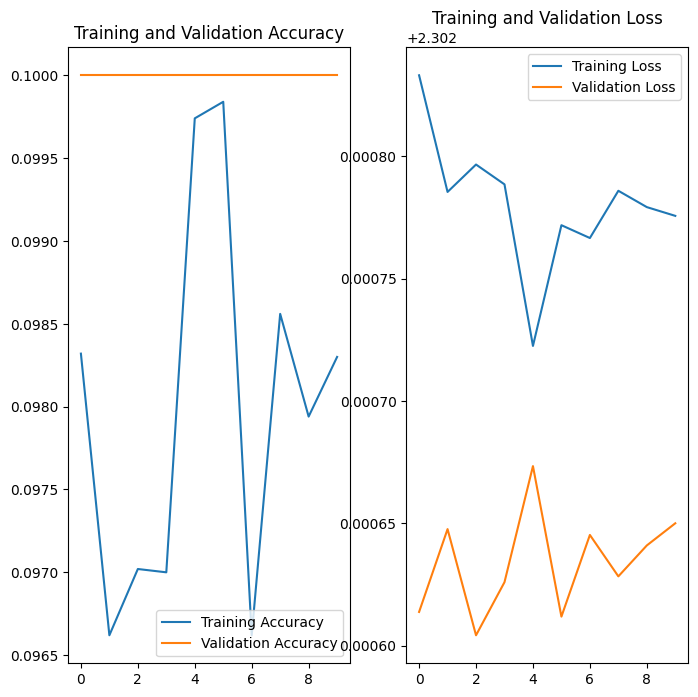

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Predict on new data

Finally, let's use our model to classify an image that wasn't included in the training or validation sets.